<a href="https://colab.research.google.com/github/heriyang9000/test2/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

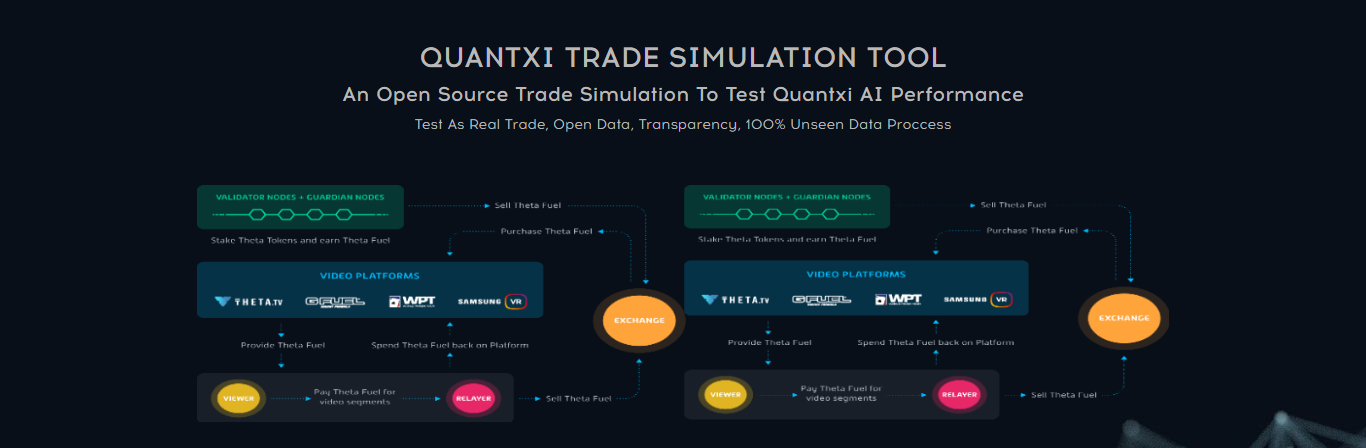

# **LIBRARY**

In [25]:
pip install yfinance

In [ ]:
pip install progressbar2

In [26]:
import getpass
import pandas as pd
import yfinance as yf
import panel as pn
import datetime
import requests
import datetime as dt
import numpy as np
import param
from bokeh.plotting import figure
from pandas_datareader import data as pdr
yf.pdr_override()
import progressbar

In [ ]:
import zipfile
import os

In [ ]:
!wget --no-check-certificate \
    "https://github.com/heriyang9000/mysys/archive/refs/heads/main.zip" \
    -O "/tmp/cats-and-dogs.zip"


zip_ref = zipfile.ZipFile('/tmp/cats-and-dogs.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
print('Test set dogs' , len(os.listdir('dog-cat-full-dataset-master/data/test/dogs')))

NameError: ignored

## **API** **KEY**

In [ ]:
api_key = getpass.getpass('Masukan Api Key Anda lalu klik enter? ')
response = requests.get(f"https://api.quantxi.com/user_profile?api_key={api_key}")
while response.json()['status'] == 'failed':
  print("Maaf API Key yang anda masukkan salah, coba di ulang lagi !!!")
  api_key = getpass.getpass('Masukan Api Key Anda lalu klik enter? ')
  response = requests.get(f"https://api.quantxi.com/user_profile?api_key={api_key}")
if response.json()['status'] == 'success':
  print(f"Selamat Datang {response.json()['data']['user_name']}")


Masukan Api Key Anda lalu klik enter? ··········
Maaf API Key yang anda masukkan salah, coba di ulang lagi !!!
Masukan Api Key Anda lalu klik enter? ··········
Maaf API Key yang anda masukkan salah, coba di ulang lagi !!!
Masukan Api Key Anda lalu klik enter? ··········
Selamat Datang heri


# **SETTING**

In [ ]:
initial_euqity = int(input('Masukan Initial Equity Anda, Min= 1,000,000 Max= 100,000,000 lalu klik enter? '))
while initial_euqity < 1000000 or initial_euqity > 100000000:
  print("Maaf initial_euqity yang anda masukkan salah, coba di ulang lagi !!!")
  initial_euqity = int(input('Masukan Initial Equity Anda, Min= 1,000,000 Max= 100,000,000 lalu klik enter? '))
print(f"Anda telah mensetting Initial Equity: {initial_euqity}")

spread = float(input('Masukan Spread+Slippage Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
while spread < 0.01 or spread > 0.05:
  print("Maaf spread yang anda masukkan salah, coba di ulang lagi !!!")
  spread = float(input('Masukan Spread+Slippage Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
print(f"Anda telah mensetting Spread: {spread}")

commision = float(input('Masukan Commision Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
while commision < 0.01 or commision > 0.05:
  print("Maaf commision yang anda masukkan salah, coba di ulang lagi !!!")
  commision = float(input('Masukan Commision Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
print(f"Anda telah mensetting Commision: {commision}")

interest = float(input('Masukan Interest Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
while interest < 0.01 or interest > 0.05:
  print("Maaf interest yang anda masukkan salah, coba di ulang lagi !!!")
  interest = float(input('Masukan Interest Anda, Min= 0.01 Max= 0.05 lalu klik enter? '))
print(f"Anda telah mensetting Interest: {interest}")

# print(f"Anda telah mensetting testing anda, Initial Equity: {initial_euqity}, Spread+Slippage: {spread}")


Masukan Initial Equity Anda, Min= 1,000,000 Max= 100,000,000 lalu klik enter? 1000000
Anda telah mensetting Initial Equity: 1000000
Masukan Spread+Slippage Anda, Min= 0.01 Max= 0.05 lalu klik enter? 0.01
Anda telah mensetting Spread: 0.01
Masukan Commision Anda, Min= 0.01 Max= 0.05 lalu klik enter? 0.01
Anda telah mensetting Commision: 0.01
Masukan Interest Anda, Min= 0.01 Max= 0.05 lalu klik enter? 0.01
Anda telah mensetting Interest: 0.01


# **DATA**

In [ ]:
#add data stock
portfolio = {"ticker":[],"data":[]}
stockdata = {"ticker":[],"startdate":[],"enddate":[]}
while len(portfolio["ticker"]) < 100000:
  ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split())) 
  for x in range(len(ticker_list)):
    if ticker_list[x] not in portfolio["ticker"]:
      ticker_data = pdr.get_data_yahoo(ticker_list[x], start=datetime.datetime(1900, 1, 1), end=datetime.datetime(2022, 1, 1))
      if len(ticker_data) > 1305:
        ticker_data.to_csv("/content/drive/MyDrive/all_ticker/{}.csv".format(ticker_list[x]))        
        portfolio["ticker"].append(ticker_list[x])
        portfolio["data"].append(ticker_data)
        stockdata["ticker"].append(ticker_list[x])
        stockdata["startdate"].append(ticker_data.index[0])
        stockdata["enddate"].append(ticker_data.index[len(ticker_data.index)-1])  
      else:
        print("maaf data ticker "+ticker_list[x]+" tidak cukup data, minimal data 1305 baris")

In [ ]:
df = pd.DataFrame(stockdata)
df.to_csv("/content/drive/MyDrive/{}.csv".format("all_tickerlist"))

In [27]:
#add data stock
portfolio = {"ticker":[],"data":[]}
# while len(portfolio["ticker"]) < 2:
ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split())) 
while len(ticker_list) < 3:
  print("maaf ticker anda tidak sampai 30, coba diulang")
  ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split())) 

for x in range(len(ticker_list)):
  if ticker_list[x] not in portfolio["ticker"]:
    # ticker_data = yf.Ticker(ticker_list[x]).history(period="max")
    ticker_data = pdr.get_data_yahoo(ticker_list[x], start=datetime.datetime(1900, 1, 1), end=datetime.datetime.now())
    if len(ticker_data) > 2:
      portfolio["ticker"].append(ticker_list[x])
      portfolio["data"].append(ticker_data)
    else:
      print("maaf data ticker "+ticker_list[x]+" tidak cukup data, minimal data 2000 baris")

Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :aapl amgn msft
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
#cleaning and rekonstruk test data
start_date = datetime.datetime(1900, 1, 1)
end_date = datetime.datetime.now()
# print(len(portfolio["data"]))
for i in range(len(portfolio["data"])):  
  # print(portfolio["data"][i])
  # print(portfolio["data"][i].index.max())
  if portfolio["data"][i].index.max() < end_date:
    end_date = portfolio["data"][i].index.max()
  if portfolio["data"][i].index.min() > start_date:
    start_date = portfolio["data"][i].index.min()
run_date = start_date
idx = []
data = []

# bar = progressbar.ProgressBar(max_value=progressbar.UnknownLength)
# i = 0
while run_date < end_date:  
  data_array = {} 
  for i in range(len(portfolio["data"])):   
    if run_date in portfolio["data"][i].index:
      data_array[portfolio["ticker"][i]] = portfolio["data"][i]["Adj Close"].loc[run_date]
    else:
      data_array[portfolio["ticker"][i]] = data[len(data)-1][portfolio["ticker"][i]]  
  idx.append(run_date)
  data.append(data_array)
  
  if run_date.weekday() == 4:
    run_date = run_date + datetime.timedelta(days=3)
  else:
    run_date = run_date + datetime.timedelta(days=1)

test_data = pd.DataFrame(data,index=idx)
test_data.index.name = "date"
# print('\n')  
print(test_data)

                  aapl        amgn        msft
date                                          
1986-03-13    0.086367    0.239596    0.061252
1986-03-14    0.091165    0.247583    0.063439
1986-03-17    0.090729    0.239596    0.064533
1986-03-18    0.093783    0.241593    0.062892
1986-03-19    0.092475    0.249579    0.061799
...                ...         ...         ...
2022-03-02  166.559998  228.589996  300.190002
2022-03-03  166.229996  232.639999  295.920013
2022-03-04  163.169998  232.910004  289.859985
2022-03-07  159.300003  234.360001  278.910004
2022-03-08  157.440002  231.100006  275.850006

[9389 rows x 3 columns]


In [ ]:
from time import sleep
from tqdm import tqdm
for i in tqdm(range(10)):
    sleep(1)

In [ ]:
pip install alive-progress

In [ ]:
from alive_progress import alive_bar
import time

for x in len(test_data), 1500:
   with alive_bar(x) as bar:
       for i in range(1000):
           time.sleep(.00005)
           bar()

In [ ]:
from sys import stdout
from time import sleep
i =0
while i < 7500:
    stdout.write("\r%d" % i)
    stdout.flush()
    sleep(0.01)
    i+=1
stdout.write("\n") # move the cursor to the next line

In [ ]:
from time import sleep
from tqdm import tqdm
import time
import sys

toolbar_width = 50

# setup toolbar
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

# for i in tqdm(range(5)):
#     sleep(1)

time.sleep(0.1) # do real work here
sys.stdout.write("***")
sys.stdout.flush()
sys.stdout.write("]\n") # this ends the progress bar



In [ ]:
test_data = pd.DataFrame()
dff = []
idx = ["2021-07-26","2021-07-27","2021-07-28","2021-07-29",]

import time
import sys
for i in range(4):
  data2 = { 
    portfolio["ticker"][0]:portfolio["data"][0]["Adj Close"].loc[idx[i]],
    portfolio["ticker"][1]:portfolio["data"][1]["Adj Close"].loc[idx[i]],
    portfolio["ticker"][2]:portfolio["data"][2]["Adj Close"].loc[idx[i]]
    }
  dff.append(data2)
  d = pd.DataFrame([data2],index=[idx[i]])
  df_ = d.copy()
  df_.columns = ['', '', '']
  # df_.index = ['' for _ in range(len(df))]
  # print(df_)
  time.sleep(0.5)
  print(f'\r', end=str(df_))
  # sys.stdout.write("\033[F") # Cursor up one line
  # print(d)
# print()

In [ ]:
df = pd.DataFrame([data2],
                  index=["circle"])
df

In [ ]:
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")['Adj Close']
print(data)

In [ ]:
# creating an empty list
lst = []
# iterating till the range
for i in range(0, 12):
    ele = input(prompt=f'Ticker{i+1} ') 
    lst.append(ele) # adding the element     
print(f"portfolio {lst}")

In [ ]:
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")
print(hist)

if len(hist) == 0:
  print("no data")

In [ ]:
pn.extension()
exchange = pn.widgets.Select(name='Select Exchange', options=['Exchange','NASDAQ', 'NYSE', 'LSE', 'EURONEXT'])
exchange

Select(options=['Exchange', 'NASDAQ', ...], value='Exchange')

In [ ]:
# pn.extension()
# cross_selector = pn.widgets.CrossSelector(name='Fruits', value=['Apple', 'Pear'], options=['Apple', 'Banana', 'Pear', 'Strawberry'])
# cross_selector
# ticker1 = pn.widgets.MultiSelect(name='Select Tickers', value=[], options=['AAPL', 'AMD', 'AMZN', 'ATN'], size=8)

pn.extension()
ticker1 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN','AAPL', 'AMD', 'AMZN', 'ATN'], size=8)
ticker2 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL2', 'AMD2', 'AMZN2', 'ATN2'], size=8)
ticker3 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL3', 'AMD3', 'AMZN3', 'ATN3'], size=8)
ticker4 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL4', 'AMD4', 'AMZN4', 'ATN4'], size=8)
if exchange.value == 'NASDAQ':
    display(ticker1)
elif exchange.value == 'NYSE':
    display(ticker2)
elif exchange.value == 'LSE':
    display(ticker3)
elif exchange.value == 'EURONEXT':
    display(ticker4)
else:
  print("no exchange select")
 

In [ ]:
print(ticker1.value[0])

In [ ]:
if len(ticker1.value) < 4:
  raise Exception("You dont have enough tickers")
else:
  df01 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df02 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df03 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df04 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df05 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df06 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df07 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df08 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df09 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df10 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df11 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df12 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df13 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df14 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df15 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df16 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df17 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df18 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df19 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df20 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df21 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df22 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df23 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df24 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df25 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df26 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df27 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df28 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df29 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df30 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")

  print(df01.to_string()) 

In [ ]:
widgets.Combobox(
    # value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
)

In [ ]:
pn.extension()
progress = pn.indicators.Progress(name='Progress', value=20, width=200)
progress

Progress(value=20, width=200)

In [ ]:
pn.extension()

terminal = pn.widgets.Terminal(
    "Welcome to the Panel Terminal!\nI'm based on xterm.js\n\n",
    options={"cursorBlink": True},
    height=300, sizing_mode='stretch_width'
)

terminal

In [ ]:
pn.extension()
large_df = pd._testing.makeCustomDataframe(100, 5) 

paginated_table = pn.widgets.Tabulator(large_df, disabled=True, pagination='remote', page_size=10)
paginated_table

In [ ]:
pn.extension()
df = pd.DataFrame({
    'int': [1, 2, 3],
    'float': [3.14, 6.28, 9.42],
    'str': ['A', 'B', 'C'],
    'bool': [True, False, True],
    'date': [dt.date(2019, 1, 1), dt.date(2020, 1, 1), dt.date(2020, 1, 10)]
}, index=[1, 2, 3])

df_widget = pn.widgets.Tabulator(df, disabled =True, configuration={"headerSort": False, "resizableColumns": False})
df_widget.servable()

In [ ]:
pn.extension()
json_obj = {   
    'data_id': "00000",
    'timestamp': "mm/dd/yyy 00:00:00",
    'buying_power': "No Data",
    'stock01_price': "No Data",
    'stock02_price': "No Data",
    'stock03_price': "No Data",
    'stock04_price': "No Data",
    'stock05_price': "No Data",
    'stock06_price': "No Data",
    'stock07_price': "No Data",
    'stock08_price': "No Data",
    'stock09_price': "No Data",
    'stock10_price': "No Data",
    'stock11_price': "No Data",
    'stock12_price': "No Data",
    'stock13_price': "No Data",
    'stock14_price': "No Data",
    'stock15_price': "No Data",
    'stock16_price': "No Data",
    'stock17_price': "No Data",
    'stock18_price': "No Data",
    'stock19_price': "No Data",
    'stock20_price': "No Data",
    'stock21_price': "No Data",
    'stock22_price': "No Data",
    'stock23_price': "No Data",
    'stock24_price': "No Data",
    'stock25_price': "No Data",
    'stock26_price': "No Data",
    'stock27_price': "No Data",
    'stock28_price': "No Data",
    'stock29_price': "No Data",
    'stock30_price': "No Data"
}

json = pn.pane.JSON(json_obj, name='JSON', height=300, width=500)

json

In [ ]:
pn.extension()
p1 = figure(width=300, height=300, name='Scatter', margin=5)
p1.scatter([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

p2 = figure(width=300, height=300, name='Line', margin=5)
p2.line([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

p3 = figure(width=300, height=300, name='Square', margin=5)
p3.square([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0], size=10)

accordion.append(p3)
accordion

In [ ]:
pn.extension()
number = pn.indicators.Number(
    name='Failure Rate', value=72, format='{value}%',
    colors=[(33, 'green'), (66, 'gold'), (100, 'red')]
)

pn.Row(number.clone(value=10), number.clone(value=42), number.clone(value=93))

In [ ]:
pn.extension()
data = {'x': np.arange(50), 'y': np.random.randn(50).cumsum()}

trend = pn.indicators.Trend(
    title='Price', data=data, width=200, height=200
)
trend
def stream_data():
    trend.stream({'x': [trend.data['x'][-1]+1], 'y': [trend.data['y'][-1]+np.random.randn()]}, rollover=50)

pn.state.add_periodic_callback(stream_data, period=250, count=100);
pn.Row(*(trend.clone(plot_type=pt) for pt in trend.param.plot_type.objects))

In [ ]:
pn.extension()
date_range_slider = pn.widgets.DateRangeSlider(
    name='Date Range Slider',
    start=dt.datetime(2017, 1, 1), end=dt.datetime(2019, 1, 1),
    value=(dt.datetime(2017, 1, 1), dt.datetime(2018, 1, 10))
)

date_range_slider

In [ ]:
from ipywidgets import Button
import asyncio

def wait_for_change(widget):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        widget.on_click(getvalue, remove=True) 
        # we need to free up the binding to getvalue to avoid an InvalidState error
        # buttons don't support unobserve
        # so use `remove=True` 
    widget.on_click(getvalue)
    return future

button = Button(description="wow")

list_to_tag = ["one", "two", "three", "four"]

async def f():
    for i in list_to_tag:
        print("going to tag {}".format(i))
        x = await wait_for_change(button)
        print("tagged {} with {}".format(i, x))
        print()

asyncio.create_task(f())
button

Button(description='wow', style=ButtonStyle())

going to tag one
tagged one with wow

going to tag two
tagged two with wow

going to tag three


In [ ]:
pn.extension()

df = pd.DataFrame({'int': [1, 2, 3], 'float': [3.14, 6.28, 9.42], 'str': ['A', 'B', 'C'], 'bool': [True, False, True]})

df_widget = pn.widgets.DataFrame(df, name='DataFrame')

df_widget

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['A Scores', 'B Scores'],
                # line_color='darkslategray',
                # fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[[100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90], # 1st column
                       [95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95]], # 2nd column
              #  line_color='darkslategray',
              #  fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=400, height=350)
fig.show()

In [ ]:
import sched, time
s = sched.scheduler(time.time, time.sleep)
def do_something(sc): 
    print("Doing stuff...")
    # do your stuff
    s.enter(60, 1, do_something, (sc,))

s.enter(60, 1, do_something, (s,))
s.run(

In [ ]:
import time
from time import sleep
starttime = time.time()
while True:
    print("tick")
    time.sleep(1.0 - ((time.time() - starttime) % 1.0))

In [ ]:
import time

def executeSomething():
    print("tick")
    time.sleep(1)

while True:
    executeSomething()

In [ ]:
#kode PILIHAN
import time
for i in range(5):
  members=["Niroshan","Brayan","Kate"]
  print("__________________________________________________________________")
  print('{:25s} {:32s} {:35s} '.format("Name","Country","Age"))
  print("__________________________________________________________________")
  print('{:25s} {:30s} {:5d} '.format(members[0],"Srilanka",i))
  print('{:25s} {:30s} {:5d} '.format(members[1],"Australia",i))
  print('{:25s} {:30s} {:5d} '.format(members[2],"England",i))
  print("__________________________________________________________________")
  # time.sleep(0.5)
  # print('\r', end='Data Input ->   :'+str(data1)) 
  # data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  # time.sleep(0.5)
  # print('\r', end='Signal Output <-:'+str(data2)) 
# print()


In [ ]:
#kode ini bagus dan jalan
import time
i=1
while i<7000:
      data1 = ["Request No: "+str(i)+", Buying Power: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
      
      print('Data Input '+str(data1)) 
      data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
      # time.sleep(0.01)
      print('Signal Output '+str(data2)) 

      print()
      i= i+1

In [ ]:
import sys
import time
for i in range(1000):    
    w = 3.45768686
    z = 3456.49495969
    y = w*z/w*i
    print(y)
    # sys.stdout.write("\033[F") # Cursor up one line
    # time.sleep(1)

In [ ]:
import time
for i in range(7000):
    data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    print('Signal Input '+str(data))
    data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    print('Signal Output '+str(data)) 
    print()
    # time.sleep(0.05) 
print()

In [ ]:
#kode ini bagus, cepat, recomended-1
import time
for i in range(7000):
    print(f"""{"Data Input=====>Request_ID: "+str(i)+", Buying_Power: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)}""")
    print(f"""{"Signal Output==>Response_ID: "+str(i)+", Signal_Timestamp: "+str(i)+", Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: "+str(i)}""")
    print("")
    # time.sleep(0.01)

In [ ]:
#kode ini bagus, cepat, recomended-1-try2
import time
for i in range(7000):
    print(f"""{"Data Input=====>Request_ID: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)}""")
    print(f"""{"Signal Output==>Response_ID: "+str(i)+", Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: "+str(i)}""")
    print("")
    time.sleep(0.01)

In [ ]:
for i in range(20):  
    print("Loading" + "." * i)
    # doSomeTimeConsumingProcessing()

    sys.stdout.write("\033[F") # Cursor up one lin

In [ ]:
import time

i = 0

goback = "\033[F" * 5  # ? this "climbs you back up 5 lines" at the next
                       # iteration, output at same spot, like `top`


for i in range(0, 9):
    print(f"""
          {i} {i} {i} {i} {i} 
          {i} {i} {i} {i} {i}
          {i} {i} {i} {i} {i} 
          {i} {i} {i} {i} {i} """)
    print("\033[F")
    time.sleep(1)
    

In [ ]:
import sys
import time

for i in range(100):
    # data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    #  print('\r', end='Signal Output '+str(data)) 
    sys.stdout.write("\r" + "Signal Output "+str(data))
    print('This is my first line', 'And this is the second line', end='') 
    time.sleep(0.01)
    # sys.stdout.flush()
print()

In [ ]:
import time
for i in range(7000):
      time.sleep(0.01)
      print("""
      '\r', end='Data Input1 '+str('{0:.3g}'.format((i/7000)*100))+' %'
      '\r', end='Data Input2 '+str('{0:.3g}'.format((i/7000)*100))+' %'
      """)
      # print('\r', end='Data Input1 '+str('{0:.3g}'.format((i/7000)*100))+' %') 
      # print('\r', end='Data Input2 '+str('{0:.3g}'.format((i/7000)*100))+' %') 

In [ ]:
print("""
Line1
Line2
""")


Line1
Line2



In [187]:
# KODE PILIHAN
from tabulate import tabulate
# import time
# import sys
print(tabulate([['Alice', 29], ['Bob', 30]], headers=['Name', 'Age']))
for x in range(7000):
  data = [['Data Input',x, x, x, x], ['Signal Output',x, x, x, x]]
  # time.sleep(0.01)
  print('\r', end=tabulate(data))
  # print('\r', end=tabulate(data))
  

Streaming output truncated to the last 5000 lines.
-------------  ----  ----  ----  ----
Data Input     5334  5334  5334  5334
Signal Output  5334  5334  5334  5334
-------------  ----  ----  ----  ----
Data Input     5335  5335  5335  5335
Signal Output  5335  5335  5335  5335
-------------  ----  ----  ----  ----
Data Input     5336  5336  5336  5336
Signal Output  5336  5336  5336  5336
-------------  ----  ----  ----  ----
Data Input     5337  5337  5337  5337
Signal Output  5337  5337  5337  5337
-------------  ----  ----  ----  ----
Data Input     5338  5338  5338  5338
Signal Output  5338  5338  5338  5338
-------------  ----  ----  ----  ----
Data Input     5339  5339  5339  5339
Signal Output  5339  5339  5339  5339
-------------  ----  ----  ----  ----
Data Input     5340  5340  5340  5340
Signal Output  5340  5340  5340  5340
-------------  ----  ----  ----  ----
Data Input     5341  5341  5341  5341
Signal Output  5341  5341  5341  5341
-------------  ----  ----  ----  ----

In [ ]:
import json
import time
for x in range(1000):
  your_json = '["foo", {"bar":["baz", '+str(x)+', 1.0, 2]}]'
  parsed = json.loads(your_json)
  time.sleep(1)
  print(end=json.dumps(parsed, indent=4, sort_keys=True))

In [ ]:
from tabulate import tabulate
import time
for x in range(100):
  all_data = [["Roll Number","Student name","Marks"],
              [1,"Sasha",str(x)],
              [2,"Richard",36],
              [3,"Judy",20],
              [4,"Lori",39],
              [5,"Maggie",40]]
  table1 = tabulate(all_data)
  table2 = tabulate(all_data,headers='firstrow')
  time.sleep(1)
  print('\r',end=table1)
  time.sleep(1)
  print('\r',end=table2)

In [ ]:
pip install localStoragePy

In [ ]:
from localStoragePy import localStoragePy
localStorage = localStoragePy('colab', 'sqlite')
localStorage.setItem('user', 'heri')

In [ ]:
localStorage.getItem('user')

'heri'

In [ ]:
pip install selenium

In [ ]:
from selenium import webdriver
driver = webdriver.Firefox() 
url='https://heriyang9000.github.io/'
driver.get(url)
scriptArray="""localStorage.setItem("key1", 'new item');
               localStorage.setItem("key2", 'second item'); 
				return Array.apply(0, new Array(localStorage.length)).map(function (o, i) { return localStorage.getItem(localStorage.key(i)); }
				)""" 	
result = driver.execute_script(scriptArray)
print(result)

In [ ]:
import csv
import numpy as np
import yfinance as yf

In [ ]:
urls=[
'amzn'
    ]

for url in urls:
    tickerTag = yf.Ticker(url)
    tickerTag.actions.to_csv("/content/drive/MyDrive/{}.csv".format(url))
    

In [ ]:
#import external pandas_datareader library with alias of web
import pandas_datareader as web
 
#import datetime internal datetime module
#datetime is a Python module
import datetime
 
#datetime.datetime is a data type within the datetime module
start = datetime.datetime(2017, 9, 1)
end = datetime.datetime(2017, 12, 31)
 
#DataReader method name is case sensitive
df = web.DataReader("nvda", 'yahoo', start, end)
 
#invoke to_csv for df dataframe object from 
#DataReader method in the pandas_datareader library
 
#..\first_yahoo_prices_to_csv_demo.csv must not
#be open in another app, such as Excel
 
df.to_csv('first_yahoo_prices_volumes_to_csv_demo.csv')

In [ ]:
from google.colab import files
folder.download('/content/sample_data')

In [ ]:
from google.colab import drive
drive.mount('/content/sample_data')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
pip install tqdm

In [51]:
from tqdm.notebook import tqdm
from time import sleep

In [ ]:
# import time
number_list = list(range(7000))
# print(number_list)
for x in tqdm(number_list):  
  # for i in range(7000):
  #   data1 = ["Request No: "+str(i)+", Buying Power: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  #   sleep(0.5)
  #   print('\r', end='Data Input '+str(data1)) 
  #   data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  #   sleep(0.5)
  #   print('\r', end='Signal Output '+str(data2))
  sleep(0.01)
print("Completed!")

In [141]:
members=["Niroshan","Brayan","Kate"]
print("__________________________________________________________________")
print('{:25s} {:32s} {:35s} '.format("Name","Country","Age"))
print("__________________________________________________________________")
print('{:25s} {:30s} {:5d} '.format(members[0],"Srilanka",20))
print('{:25s} {:30s} {:5d} '.format(members[1],"Australia",25))
print('{:25s} {:30s} {:5d} '.format(members[2],"England",30))
print("__________________________________________________________________")

__________________________________________________________________
Name                      Country                          Age                                 
__________________________________________________________________
Niroshan                  Srilanka                          20 
Brayan                    Australia                         25 
Kate                      England                           30 
__________________________________________________________________
